### Let's build simple graphs based on the dynamics of detection of patients and the number of people being treated

In [1]:
from tqdm.auto import tqdm
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (16, 9)

In [3]:
import datetime

In [4]:
def date_to_string(input_date):
    """Transform date to string representation
    
    Examples
    --------
    >> date_to_string(datetime.date(2020, 5, 20))
    20.05.2020
    
    """
    result = '{:02d}'.format(input_date.day) + '.' + '{:02d}'.format(input_date.month) + '.' + str(input_date.year)
    return result

### Specify the data for which region to use

'Московская обл.', 'Москва', 'Нижегородская обл.', 'Липецкая обл.',
       'Санкт-Петербург', 'Белгородская обл.', 'Калининградская обл.',
       'Адыгея', 'Алтайский край', 'Амурская обл.', 'Архангельская обл.',
       'Астраханская обл.', 'Башкортостан', 'Брянская обл.', 'Бурятия',
       'Владимирская обл.', 'Волгоградская обл.', 'Вологодская обл.',
       'Воронежская обл.', 'Дагестан', 'Еврейская АО',
       'Забайкальский край', 'Ивановская обл.', 'Ингушетия',
       'Иркутская обл.', 'Кабардино-Балкария', 'Калмыкия',
       'Калужская обл.', 'Камчатский край', 'Карачаево-Черкессия',
       'Карелия', 'Кемеровская обл.', 'Кировская обл.', 'Коми',
       'Костромская обл.', 'Краснодарский край', 'Красноярский край',
       'Крым', 'Курганская обл.', 'Курская обл.', 'Ленинградская обл.',
       'Магаданская обл.', 'Марий Эл', 'Мордовия', 'Мурманская обл.',
       'Новгородская обл.', 'Новосибирская обл.', 'Омская обл.',
       'Оренбургская обл.', 'Орловская обл.', 'Пензенская обл.',
       'Пермский край', 'Приморский край', 'Псковская обл.',
       'Ростовская обл.', 'Рязанская обл.', 'Самарская обл.',
       'Саратовская обл.', 'Саха (Якутия)', 'Сахалинская обл.',
       'Свердловская обл.', 'Севастополь', 'Северная Осетия',
       'Смоленская обл.', 'Ставропольский край', 'Тамбовская обл.',
       'Татарстан', 'Тверская обл.', 'Томская обл.', 'Тульская обл.',
       'Тыва', 'Тюменская обл.', 'Удмуртия', 'Ульяновская обл.',
       'Хабаровский край', 'Хакасия', 'ХМАО – Югра', 'Челябинская обл.',
       'Чечня', 'Чувашия', 'Ямало-Ненецкий АО', 'Ярославская обл.',
       'Ненецкий АО', 'Чукотский АО', 'Алтай'

In [5]:
region = 'Ставропольский край'

### Setting a date range for analysis

In [27]:
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 6, 15)

In [28]:
date_generated = [min_date + datetime.timedelta(days=x) for x in range(0, (max_date-min_date).days)]

### Creating a dataframe

In [17]:
region_data = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
index = 0
for each_date in date_generated:
    filename = date_to_string(each_date) + '.csv'
    path_to_data = '../data/' + filename
    data = pd.read_csv(path_to_data, sep=';')
    data = data.set_index('region')
    region_data.loc[index, 'date'] = each_date
    region_data.loc[index, 'infections'] = data.loc[region, 'infections']
    region_data.loc[index, 'recoveries'] = -data.loc[region, 'recoveries']
    region_data.loc[index, 'deaths'] = data.loc[region, 'deaths']
    if index == 0:
        region_data.loc[index, 'on_medication'] = data.loc[region, 'infections']
    else:
        region_data.loc[index, 'on_medication'] = region_data.loc[index-1, 'on_medication'] + data.loc[region, 'infections'] - data.loc[region, 'recoveries'] - data.loc[region, 'deaths']
    index += 1
region_data['on_medication_tempo'] = region_data['on_medication'].diff() 

На лечении в регионах (кроме Москвы и МО)

In [34]:
regions_list = ['Нижегородская обл.', 'Липецкая обл.',
       'Санкт-Петербург', 'Белгородская обл.', 'Калининградская обл.',
       'Адыгея', 'Алтайский край', 'Амурская обл.', 'Архангельская обл.',
       'Астраханская обл.', 'Башкортостан', 'Брянская обл.', 'Бурятия',
       'Владимирская обл.', 'Волгоградская обл.', 'Вологодская обл.',
       'Воронежская обл.', 'Дагестан', 'Еврейская АО',
       'Забайкальский край', 'Ивановская обл.', 'Ингушетия',
       'Иркутская обл.', 'Кабардино-Балкария', 'Калмыкия',
       'Калужская обл.', 'Камчатский край', 'Карачаево-Черкессия',
       'Карелия', 'Кемеровская обл.', 'Кировская обл.', 'Коми',
       'Костромская обл.', 'Краснодарский край', 'Красноярский край',
       'Крым', 'Курганская обл.', 'Курская обл.', 'Ленинградская обл.',
       'Магаданская обл.', 'Марий Эл', 'Мордовия', 'Мурманская обл.',
       'Новгородская обл.', 'Новосибирская обл.', 'Омская обл.',
       'Оренбургская обл.', 'Орловская обл.', 'Пензенская обл.',
       'Пермский край', 'Приморский край', 'Псковская обл.',
       'Ростовская обл.', 'Рязанская обл.', 'Самарская обл.',
       'Саратовская обл.', 'Саха (Якутия)', 'Сахалинская обл.',
       'Свердловская обл.', 'Севастополь', 'Северная Осетия',
       'Смоленская обл.', 'Ставропольский край', 'Тамбовская обл.',
       'Татарстан', 'Тверская обл.', 'Томская обл.', 'Тульская обл.',
       'Тыва', 'Тюменская обл.', 'Удмуртия', 'Ульяновская обл.',
       'Хабаровский край', 'Хакасия', 'ХМАО – Югра', 'Челябинская обл.',
       'Чечня', 'Чувашия', 'Ямало-Ненецкий АО', 'Ярославская обл.',
       'Ненецкий АО', 'Чукотский АО', 'Алтай']

In [35]:
result_df = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
region_data = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
counter = 0
index = 0
for each_region_index in tqdm(range(len(regions_list))):
    each_region = regions_list[each_region_index]
    for each_date in date_generated:
        filename = date_to_string(each_date) + '.csv'
        path_to_data = '../data/' + filename
        data = pd.read_csv(path_to_data, sep=';')
        data = data.set_index('region')
        region_data.loc[index, 'date'] = each_date
        region_data.loc[index, 'infections'] = data.loc[each_region, 'infections']
        region_data.loc[index, 'recoveries'] = -data.loc[each_region, 'recoveries']
        region_data.loc[index, 'deaths'] = data.loc[each_region, 'deaths']
        if index == 0:
            region_data.loc[index, 'on_medication'] = data.loc[each_region, 'infections']
        else:
            region_data.loc[index, 'on_medication'] = region_data.loc[index-1, 'on_medication'] + data.loc[each_region, 'infections'] - data.loc[each_region, 'recoveries'] - data.loc[each_region, 'deaths']
        index += 1
    index = 0
    region_data['on_medication_tempo'] = region_data['on_medication'].diff() 
    if counter == 0:
        result_df = region_data.copy()
    else:
        add_df = result_df.drop(['date'], axis=1).add(region_data.drop(['date'], axis=1), fill_value=0)
        add_df['date'] = result_df['date']
        result_df = add_df
    counter += 1

### Building plots

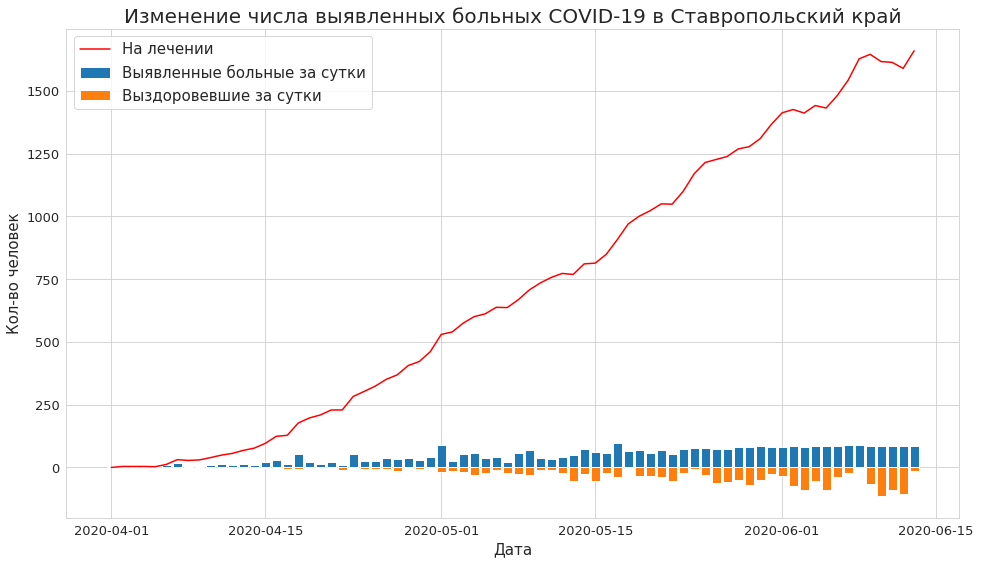

In [18]:
plt.title('Изменение числа выявленных больных COVID-19 в {0}'.format(region), fontsize=20)
plt.bar(region_data['date'], region_data['infections'], label='Выявленные больные за сутки')
plt.bar(region_data['date'], region_data['recoveries'], label='Выздоровевшие за сутки')
plt.plot(region_data['date'], region_data['on_medication'], color='r', label='На лечении')
plt.xlabel('Дата', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Кол-во человек', fontsize=15)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)

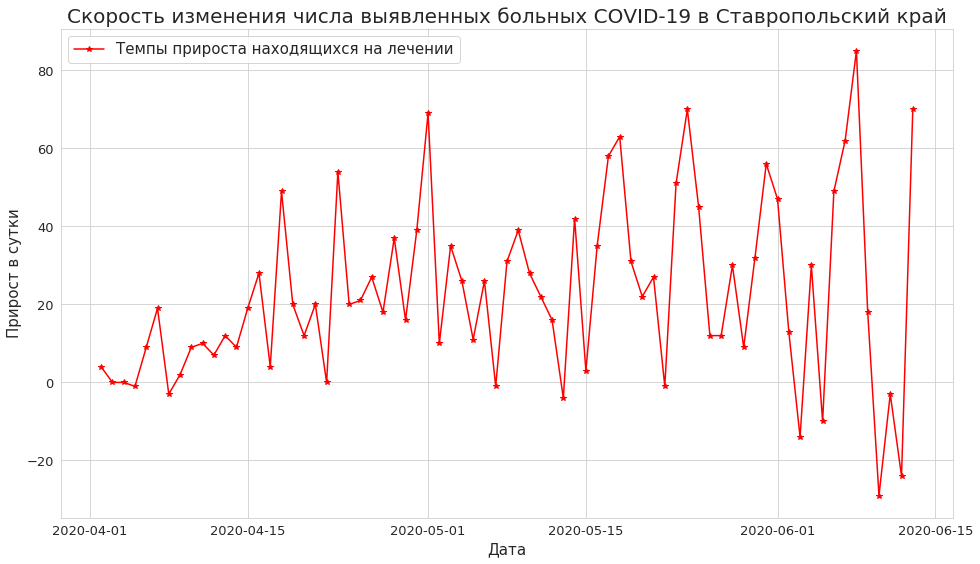

In [19]:
plt.title('Скорость изменения числа выявленных больных COVID-19 в {0}'.format(region), fontsize=20)
plt.plot(region_data['date'], region_data['on_medication_tempo'], '-*', color='r', label='Темпы прироста находящихся на лечении')
plt.xlabel('Дата', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Прирост в сутки', fontsize=15)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)

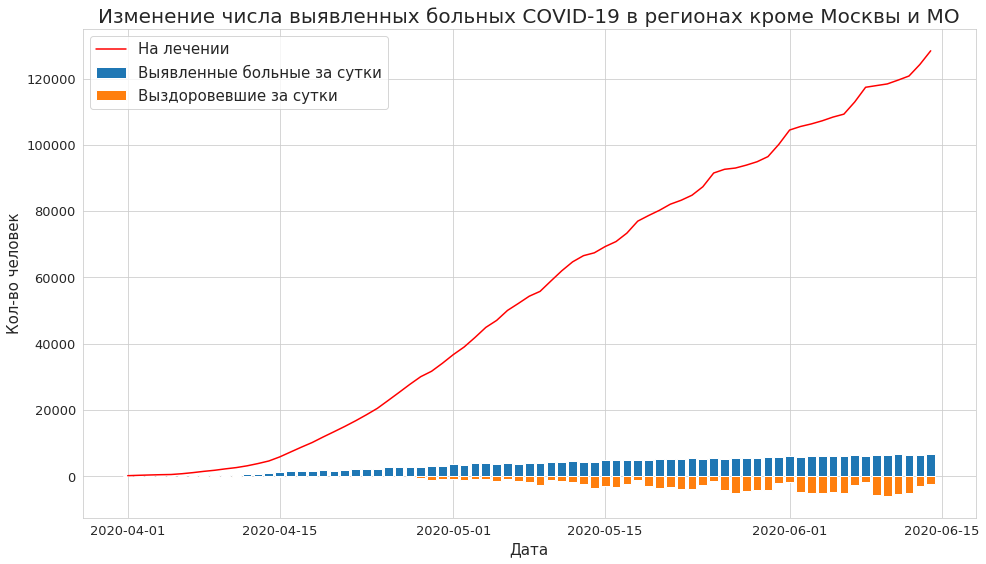

In [36]:
plt.title('Изменение числа выявленных больных COVID-19 в регионах кроме Москвы и МО', fontsize=20)
plt.bar(result_df['date'], result_df['infections'], label='Выявленные больные за сутки')
plt.bar(result_df['date'], result_df['recoveries'], label='Выздоровевшие за сутки')
plt.plot(result_df['date'], result_df['on_medication'], color='r', label='На лечении')
plt.xlabel('Дата', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Кол-во человек', fontsize=15)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)

Три кривые - Москва + МО, Россия, Россия без Москвы и МО

1. Москва + МО

In [37]:
regions_list = ['Москва', 'Московская обл.']

moscow_and_mo_df = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
region_data = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
counter = 0
index = 0
for each_region_index in tqdm(range(len(regions_list))):
    each_region = regions_list[each_region_index]
    print(each_region)
    for each_date in date_generated:
        filename = date_to_string(each_date) + '.csv'
        path_to_data = '../data/' + filename
        data = pd.read_csv(path_to_data, sep=';')
        data = data.set_index('region')
        region_data.loc[index, 'date'] = each_date
        region_data.loc[index, 'infections'] = data.loc[each_region, 'infections']
        region_data.loc[index, 'recoveries'] = -data.loc[each_region, 'recoveries']
        region_data.loc[index, 'deaths'] = data.loc[each_region, 'deaths']
        if index == 0:
            region_data.loc[index, 'on_medication'] = data.loc[each_region, 'infections']
        else:
            region_data.loc[index, 'on_medication'] = region_data.loc[index-1, 'on_medication'] + data.loc[each_region, 'infections'] - data.loc[each_region, 'recoveries'] - data.loc[each_region, 'deaths']
        index += 1
    index = 0
    region_data['on_medication_tempo'] = region_data['on_medication'].diff() 
    if counter == 0:
        moscow_and_mo_df = region_data.copy()
    else:

        add_df = moscow_and_mo_df.drop(['date'], axis=1).add(region_data.drop(['date'], axis=1), fill_value=0)
        add_df['date'] = moscow_and_mo_df['date']
        moscow_and_mo_df = add_df
        print(counter)
    counter += 1

Москва
          date infections recoveries deaths  on_medication  \
70  2020-06-10       1195      -3796     56        81685.0   
71  2020-06-11       1436      -2236     53        80832.0   
72  2020-06-12       1714      -2255     49        80242.0   
73  2020-06-13       1493      -1534     44        80157.0   
74  2020-06-14       1477      -2133     50        79451.0   

    on_medication_tempo  
70              -2657.0  
71               -853.0  
72               -590.0  
73                -85.0  
74               -706.0  
+++++++++++++++++
Московская обл.
          date infections recoveries deaths  on_medication  \
70  2020-06-10       1195      -3796     56        81685.0   
71  2020-06-11       1436      -2236     53        80832.0   
72  2020-06-12       1714      -2255     49        80242.0   
73  2020-06-13       1493      -1534     44        80157.0   
74  2020-06-14       1477      -2133     50        79451.0   

    on_medication_tempo  
70              -2657.0  
71   

Все регионы

In [38]:
regions_list = ['Москва', 'Московская обл.', 'Нижегородская обл.', 'Липецкая обл.',
       'Санкт-Петербург', 'Белгородская обл.', 'Калининградская обл.',
       'Адыгея', 'Алтайский край', 'Амурская обл.', 'Архангельская обл.',
       'Астраханская обл.', 'Башкортостан', 'Брянская обл.', 'Бурятия',
       'Владимирская обл.', 'Волгоградская обл.', 'Вологодская обл.',
       'Воронежская обл.', 'Дагестан', 'Еврейская АО',
       'Забайкальский край', 'Ивановская обл.', 'Ингушетия',
       'Иркутская обл.', 'Кабардино-Балкария', 'Калмыкия',
       'Калужская обл.', 'Камчатский край', 'Карачаево-Черкессия',
       'Карелия', 'Кемеровская обл.', 'Кировская обл.', 'Коми',
       'Костромская обл.', 'Краснодарский край', 'Красноярский край',
       'Крым', 'Курганская обл.', 'Курская обл.', 'Ленинградская обл.',
       'Магаданская обл.', 'Марий Эл', 'Мордовия', 'Мурманская обл.',
       'Новгородская обл.', 'Новосибирская обл.', 'Омская обл.',
       'Оренбургская обл.', 'Орловская обл.', 'Пензенская обл.',
       'Пермский край', 'Приморский край', 'Псковская обл.',
       'Ростовская обл.', 'Рязанская обл.', 'Самарская обл.',
       'Саратовская обл.', 'Саха (Якутия)', 'Сахалинская обл.',
       'Свердловская обл.', 'Севастополь', 'Северная Осетия',
       'Смоленская обл.', 'Ставропольский край', 'Тамбовская обл.',
       'Татарстан', 'Тверская обл.', 'Томская обл.', 'Тульская обл.',
       'Тыва', 'Тюменская обл.', 'Удмуртия', 'Ульяновская обл.',
       'Хабаровский край', 'Хакасия', 'ХМАО – Югра', 'Челябинская обл.',
       'Чечня', 'Чувашия', 'Ямало-Ненецкий АО', 'Ярославская обл.',
       'Ненецкий АО', 'Чукотский АО', 'Алтай']

all_regions_df = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
region_data = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
counter = 0
index = 0
for each_region_index in tqdm(range(len(regions_list))):
    each_region = regions_list[each_region_index]
    for each_date in date_generated:
        filename = date_to_string(each_date) + '.csv'
        path_to_data = '../data/' + filename
        data = pd.read_csv(path_to_data, sep=';')
        data = data.set_index('region')
        region_data.loc[index, 'date'] = each_date
        region_data.loc[index, 'infections'] = data.loc[each_region, 'infections']
        region_data.loc[index, 'recoveries'] = -data.loc[each_region, 'recoveries']
        region_data.loc[index, 'deaths'] = data.loc[each_region, 'deaths']
        if index == 0:
            region_data.loc[index, 'on_medication'] = data.loc[each_region, 'infections']
        else:
            region_data.loc[index, 'on_medication'] = region_data.loc[index-1, 'on_medication'] + data.loc[each_region, 'infections'] - data.loc[each_region, 'recoveries'] - data.loc[each_region, 'deaths']
        index += 1
    index = 0
    region_data['on_medication_tempo'] = region_data['on_medication'].diff() 
    if counter == 0:
        all_regions_df = region_data.copy()
        
    else:
        add_df = all_regions_df.drop(['date'], axis=1).add(region_data.drop(['date'], axis=1), fill_value=0)
        add_df['date'] = all_regions_df['date']
        all_regions_df = add_df
    counter += 1

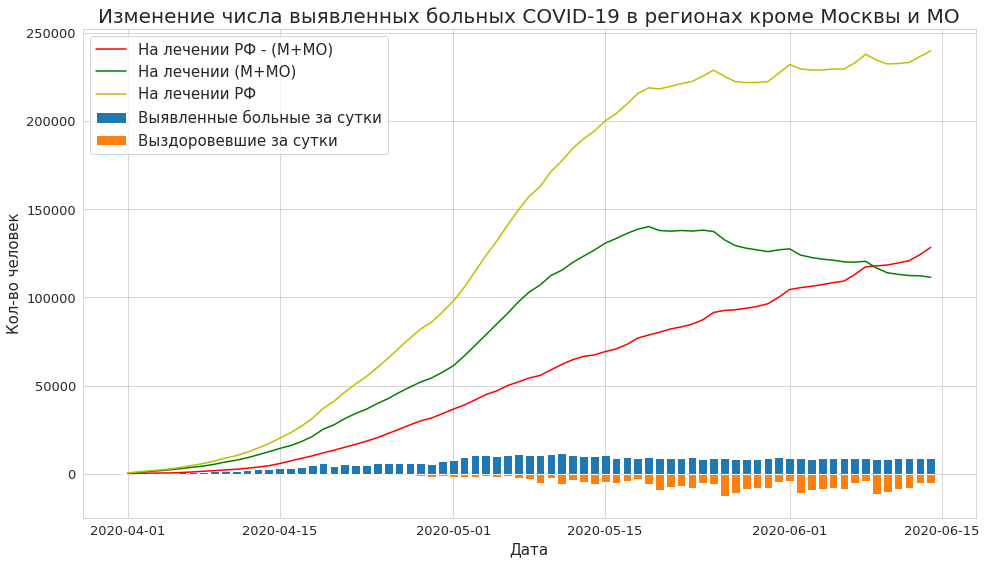

In [39]:
plt.title('Изменение числа выявленных больных COVID-19 в регионах кроме Москвы и МО', fontsize=20)
plt.bar(all_regions_df['date'], all_regions_df['infections'], label='Выявленные больные за сутки')
plt.bar(all_regions_df['date'], all_regions_df['recoveries'], label='Выздоровевшие за сутки')
plt.plot(result_df['date'], result_df['on_medication'], color='r', label='На лечении РФ - (М+МО)')
plt.plot(moscow_and_mo_df['date'], moscow_and_mo_df['on_medication'], color='g', label='На лечении (М+МО) ')
plt.plot(all_regions_df['date'], all_regions_df['on_medication'], color='y', label='На лечении РФ')
plt.xlabel('Дата', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Кол-во человек', fontsize=15)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)

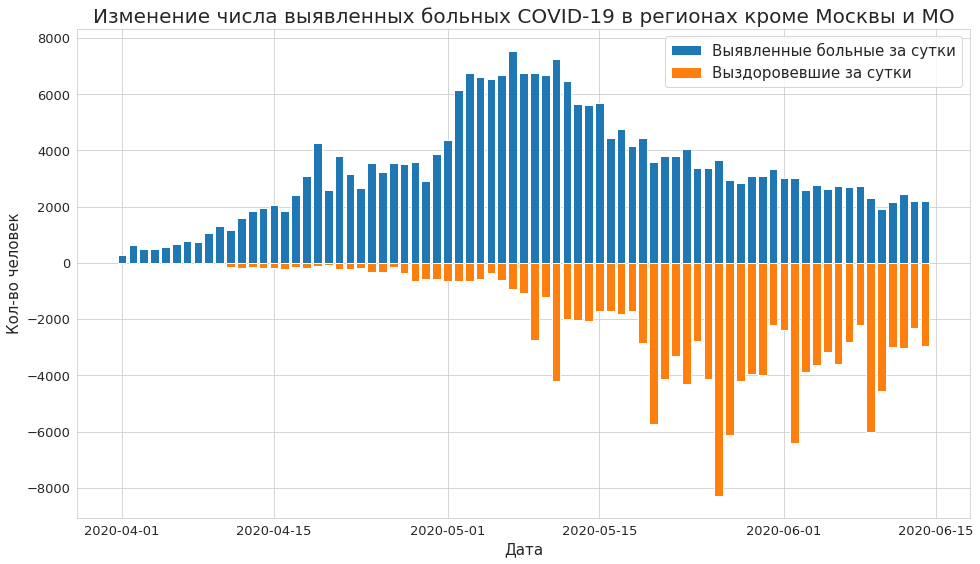

In [40]:
plt.title('Изменение числа выявленных больных COVID-19 в регионах кроме Москвы и МО', fontsize=20)
plt.bar(moscow_and_mo_df['date'], moscow_and_mo_df['infections'], label='Выявленные больные за сутки')
plt.bar(moscow_and_mo_df['date'], moscow_and_mo_df['recoveries'], label='Выздоровевшие за сутки')
# plt.plot(moscow_and_mo_df['date'], moscow_and_mo_df['on_medication'], color='g', label='На лечении (М+МО) ')
plt.xlabel('Дата', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Кол-во человек', fontsize=15)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)

In [42]:
moscow_and_mo_df['infections'] = moscow_and_mo_df['infections'].apply(lambda x: int(x))

In [43]:
moscow_and_mo_df.describe()

,infections,on_medication,on_medication_tempo
count,74.000000,74.000000,73.000000
mean,2740.743243,62109.621622,1094.383562
std,1632.769083,40311.469231,2349.794380
min,267.000000,267.000000,-5279.000000
25%,1607.500000,21383.750000,-382.000000
50%,2441.500000,80199.500000,1104.000000
75%,3438.250000,96773.750000,2503.000000
max,6703.000000,114978.000000,5895.000000


In [44]:
region_data1 = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])
region_data2 = pd.DataFrame(columns=['date', 'infections', 'recoveries', 'deaths'])

In [49]:
region_data1.loc[0, 'date'] = datetime.date(2020, 5, 20)
region_data1.loc[0, 'infections'] = 100
region_data1.loc[0, 'recoveries'] = 200
region_data1.loc[0, 'deaths'] = 3

In [47]:
region_data2.loc[0, 'date'] = datetime.date(2020, 5, 20)
region_data2.loc[0, 'infections'] = 1
region_data2.loc[0, 'recoveries'] = 2
region_data2.loc[0, 'deaths'] = 0

In [50]:
region_data1

,date,infections,recoveries,deaths
0,2020-05-20,100,200,3


In [51]:
region_data2

,date,infections,recoveries,deaths
0,2020-05-20,1,2,0


In [52]:
add_df = region_data1.drop(['date'], axis=1).add(region_data2.drop(['date'], axis=1), fill_value=0)

In [53]:
add_df

,infections,recoveries,deaths
0,101,202,3
